In [36]:
import pandas as pd
df = pd.DataFrame({'Color_Score': [24,67,43,89,31,37,70,25,56,94,
                                   43,2,90,32,78,97,3,66,81,1],
                  'Fruit_Actual': ['Not Apple','Apple','Not Apple','Apple',
                            'Not Apple','Not Apple','Apple','Not Apple','Apple','Apple',
                           'Not Apple','Not Apple','Apple','Not Apple','Apple'
                           ,'Apple','Not Apple','Apple','Apple','Not Apple']})

In [37]:
df

,Color_Score,Fruit_Actual
0,24,Not Apple
1,67,Apple
2,43,Not Apple
3,89,Apple
4,31,Not Apple
5,37,Not Apple
6,70,Apple
7,25,Not Apple
8,56,Apple
9,94,Apple


In [38]:
df['Fruit_Actual'] = df['Fruit_Actual'].map({'Apple':1,'Not Apple':0})
df

,Color_Score,Fruit_Actual
0,24,0
1,67,1
2,43,0
3,89,1
4,31,0
5,37,0
6,70,1
7,25,0
8,56,1
9,94,1


[ 1  2  3 24 25 31 32 37 43 43 56 66 67 70 78 81 89 90 94 97]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


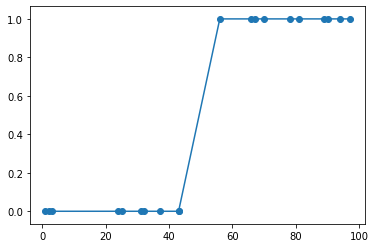

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df['Color_Score'],df['Fruit_Actual'])
xaxis = np.sort(df['Color_Score'])
print(xaxis)
yaxis = np.sort(df['Fruit_Actual'])
print(yaxis)
plt.plot(xaxis,yaxis)

In [4]:
x = df.iloc[:,[0]].values
x

array([[24],
       [67],
       [43],
       [89],
       [31],
       [37],
       [70],
       [25],
       [56],
       [94],
       [43],
       [ 2],
       [90],
       [32],
       [78],
       [97],
       [ 3],
       [66],
       [81],
       [ 1]], dtype=int64)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def scaling(x):
    scaler.fit(x)
    return scaler.transform(x)

df['Color_Score'] = scaling(x)
df

,Color_Score,Fruit_Actual
0,-0.887867,0
1,0.502963,1
2,-0.273314,0
3,1.214551,1
4,-0.661453,0
5,-0.467384,0
6,0.599998,1
7,-0.855522,0
8,0.147169,1
9,1.376275,1


In [6]:
test = df.sample(7)
test

,Color_Score,Fruit_Actual
1,0.502963,1
18,0.955792,1
17,0.470618,1
15,1.473310,1
13,-0.629108,0
10,-0.273314,0
11,-1.599455,0


In [7]:
train = df[~df.isin(test)]
train

,Color_Score,Fruit_Actual
0,-0.887867,0.0
1,NaN,NaN
2,-0.273314,0.0
3,1.214551,1.0
4,-0.661453,0.0
5,-0.467384,0.0
6,0.599998,1.0
7,-0.855522,0.0
8,0.147169,1.0
9,1.376275,1.0


In [8]:
train.dropna(inplace = True)
train

,Color_Score,Fruit_Actual
0,-0.887867,0.0
2,-0.273314,0.0
3,1.214551,1.0
4,-0.661453,0.0
5,-0.467384,0.0
6,0.599998,1.0
7,-0.855522,0.0
8,0.147169,1.0
9,1.376275,1.0
12,1.246896,1.0


In [9]:
train.shape

(13, 2)

In [10]:
test.shape

(7, 2)

In [11]:
x_train, y_train = train.Color_Score, train['Fruit_Actual']
x_test, y_test = test.Color_Score, test['Fruit_Actual']

In [12]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [13]:
import numpy as np
for i in range(len(df)):
    r = sigmoid(x_test)
r

1     0.623155
18    0.722278
17    0.615530
15    0.813560
13    0.347713
10    0.432094
11    0.168058
Name: Color_Score, dtype: float64

In [14]:
test['Predicted'] = np.round(r)
test

,Color_Score,Fruit_Actual,Predicted
1,0.502963,1,1.0
18,0.955792,1,1.0
17,0.470618,1,1.0
15,1.473310,1,1.0
13,-0.629108,0,0.0
10,-0.273314,0,0.0
11,-1.599455,0,0.0


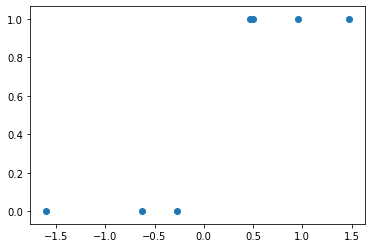

In [19]:
import matplotlib.pyplot as plt
plt.scatter(test['Color_Score'],test['Predicted'])

[-1.59945487 -0.62910814 -0.27331433  0.47061817  0.50296306  0.95579154
  1.4733098 ]
[0. 0. 0. 1. 1. 1. 1.]


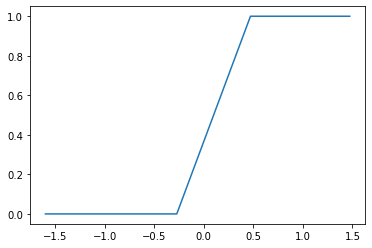

In [31]:
xaxis = np.sort(test['Color_Score'])
print(xaxis)
yaxis = np.sort(test['Predicted'])
print(yaxis)
plt.plot(xaxis,yaxis)

[-1.63179977 -1.59945487 -1.56710998 -0.88786727 -0.85552237 -0.66145303
 -0.62910814 -0.46738368 -0.27331433 -0.27331433  0.14716926  0.47061817
  0.50296306  0.59999773  0.85875686  0.95579154  1.21455067  1.24689556
  1.37627512  1.4733098 ]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


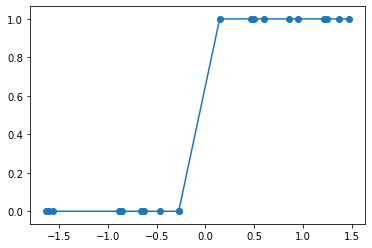

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df['Color_Score'],df['Fruit_Actual'])
xaxis = np.sort(df['Color_Score'])
print(xaxis)
yaxis = np.sort(df['Fruit_Actual'])
print(yaxis)
plt.plot(xaxis,yaxis)

In [ ]:
new = [40,56,32,78]
new = np.asarray(new).reshape(-1,1)
new = scaling(new)
new

In [ ]:
import numpy as np
for i in range(len(df)):
    r = sigmoid(new)
r

In [ ]:
np.round(r)